In [1]:
import numpy as np
from qiskit import Aer, execute, QuantumCircuit, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.extensions import Initialize
import matplotlib.pyplot as plt
from qiskit_textbook.tools import random_state
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

provider=IBMQ.load_account()

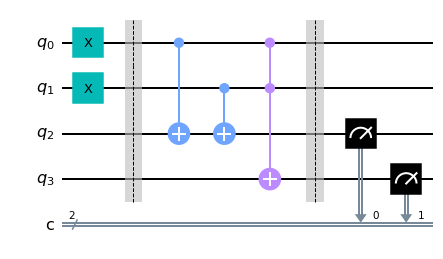

In [2]:
qc= QuantumCircuit(4,2)
qc.x(0) #first bit is 1
qc.x(1) #second bit is 1
qc.barrier()
#as 1+1=2. our circuit should return 10

qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.barrier()

# extract outputs
qc.measure(2,0) # extract XOR value
qc.measure(3,1) # extract AND value

qc.draw()



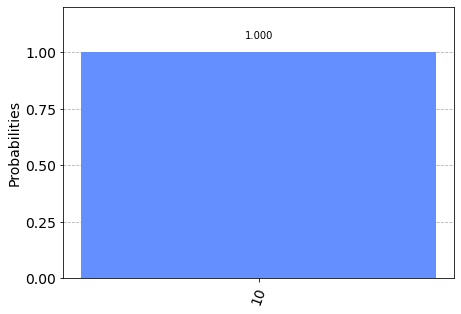

In [3]:
backend= Aer.get_backend('aer_simulator')
job= assemble(qc)
result= backend.run(job).result().get_counts()
plot_histogram(result)

In [4]:
##SO far we have only used simulator
##to run on actual hardware we need to make serious changes as hardware doesnt perfrom operations 
#> after measurement has been made,
##PS: Measurement operations right in between the cicuit

##Solution: deferred measurements

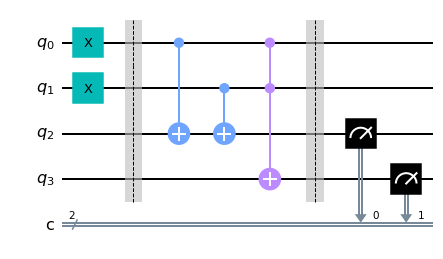

In [5]:
qc= QuantumCircuit(4,2)
qc.x(0) #first bit is 1
qc.x(1) #second bit is 1
qc.barrier()
#as 1+1=2. our circuit should return 10

qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.barrier()

# extract outputs
qc.measure(2,0) # extract XOR value
qc.measure(3,1) # extract AND value

qc.draw()



In [6]:
#executing hardware
IBMQ.load_account()
provider=IBMQ.get_provider( hub='ibm-q')

ibmqfactory.load_account:WARNING:2021-12-15 06:06:00,481: Credentials are already in use. The existing account in the session will be replaced.


In [8]:
##of that, we get the least strained hardware and run our circuit over it
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

backend= least_busy(provider.backends( filters= lambda b: b.configuration().n_qubits >=3 and
                                      not b.configuration().simulator and b.status().operational== True))

t_qc=transpile(qc, backend, optimization_level=3)
job= backend.run(t_qc)
job_monitor(job)   

                 

Job Status: job has successfully run


{'00': 737, '01': 862, '10': 1433, '11': 968}


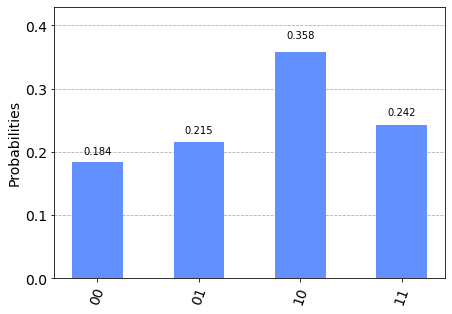

In [9]:
exp_count=job.result().get_counts(qc)
print(exp_count)
plot_histogram(exp_count)

In [12]:
print(f" the experimental accuracy rate is : {exp_count['10']/sum(exp_count.values()) :.3f}%")

 the experimental accuracy rate is : 0.358%


In [ ]:
##lastly
# backend: ibmq_manila
# Validating: 918ms
# In queue: 3m 42s
# Running: 32.1s
# time in system 4.6s